In [65]:
import pandas as pd

Import the dataset

In [66]:
# Load the training dataset
train_df = pd.read_csv('train.csv')

# Load the testing dataset
test_df = pd.read_csv('test.csv')

In [67]:
train_df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001


In [68]:
test_df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL
0,2018-06-01 00:00:00,27.141001,7.623,36.911999,8.819,-10.054,-1.653
1,2018-06-01 01:00:00,24.962999,7.539,37.340000,9.436,-11.365,-1.653
2,2018-06-01 02:00:00,22.282000,7.455,34.526001,9.302,-12.634,-1.653
3,2018-06-01 03:00:00,20.941999,5.277,33.373001,7.425,-12.751,-1.653
4,2018-06-01 04:00:00,14.324000,0.000,27.368999,4.959,-12.996,-1.653


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    69680 non-null  object 
 1   HUFL    69680 non-null  float64
 2   HULL    69680 non-null  float64
 3   MUFL    69680 non-null  float64
 4   MULL    69680 non-null  float64
 5   LUFL    69680 non-null  float64
 6   LULL    69680 non-null  float64
 7   OT      69680 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    620 non-null    object 
 1   HUFL    620 non-null    float64
 2   HULL    620 non-null    float64
 3   MUFL    620 non-null    float64
 4   MULL    620 non-null    float64
 5   LUFL    620 non-null    float64
 6   LULL    620 non-null    float64
dtypes: float64(6), object(1)
memory usage: 34.0+ KB


In [71]:
train_df.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000
mean,7.413993,2.261418,4.322226,0.896509,3.082888,0.857907,13.320642
std,7.082928,2.041293,6.829189,1.807239,1.174063,0.600440,8.564817
min,-23.242001,-5.693000,-26.367001,-6.041000,-1.188000,-1.371000,-4.221000
25%,5.827000,0.804000,3.305000,-0.284000,2.315000,0.670000,6.964000
50%,8.841000,2.210000,6.005000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.655000,1.218000,18.079000
max,24.180000,10.315000,18.087000,7.853000,8.498000,3.046000,46.007000


In [72]:
test_df.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,31.385674,9.014785,42.474745,10.120048,-10.918552,-1.972253
std,5.229128,2.123674,5.090988,1.672134,1.219483,0.740444
min,14.324000,0.000000,27.368999,4.959000,-13.934000,-3.124000
25%,27.811001,7.623000,38.835249,8.919500,-11.964750,-2.591000
50%,30.827000,8.963000,42.112000,10.025000,-10.875000,-2.452000
75%,34.596001,10.471000,45.763750,11.312000,-9.979000,-1.340500
max,47.495998,17.004999,56.185001,15.628000,-7.047000,0.000000


In [73]:
# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
dtype: int64


Feature Engineerinng

In [74]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])


In [75]:
train_df.head(10)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
5,2016-07-01 01:15:00,5.492,1.942,1.457,0.391,4.112,1.279,27.716999
6,2016-07-01 01:30:00,5.358,1.875,1.350,0.355,3.929,1.340,27.646000
7,2016-07-01 01:45:00,5.157,1.808,1.350,0.320,3.807,1.279,27.084000
8,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
9,2016-07-01 02:15:00,5.157,1.808,1.350,0.426,3.777,1.188,27.506001


In [76]:
# Extracting time-based features
train_df['hour'] = train_df['date'].dt.hour
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['month'] = train_df['date'].dt.month

test_df['hour'] = test_df['date'].dt.hour
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['month'] = test_df['date'].dt.month


In [77]:
train_df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,hour,day_of_week,month
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,0,4,7
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,0,4,7
2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,0,4,7
3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,0,4,7
4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,1,4,7


In [78]:
test_df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,hour,day_of_week,month
0,2018-06-01 00:00:00,27.141001,7.623,36.911999,8.819,-10.054,-1.653,0,4,6
1,2018-06-01 01:00:00,24.962999,7.539,37.340000,9.436,-11.365,-1.653,1,4,6
2,2018-06-01 02:00:00,22.282000,7.455,34.526001,9.302,-12.634,-1.653,2,4,6
3,2018-06-01 03:00:00,20.941999,5.277,33.373001,7.425,-12.751,-1.653,3,4,6
4,2018-06-01 04:00:00,14.324000,0.000,27.368999,4.959,-12.996,-1.653,4,4,6


In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         69680 non-null  datetime64[ns]
 1   HUFL         69680 non-null  float64       
 2   HULL         69680 non-null  float64       
 3   MUFL         69680 non-null  float64       
 4   MULL         69680 non-null  float64       
 5   LUFL         69680 non-null  float64       
 6   LULL         69680 non-null  float64       
 7   OT           69680 non-null  float64       
 8   hour         69680 non-null  int32         
 9   day_of_week  69680 non-null  int32         
 10  month        69680 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(3)
memory usage: 5.1 MB


 Exploratory Data Analysis (EDA)

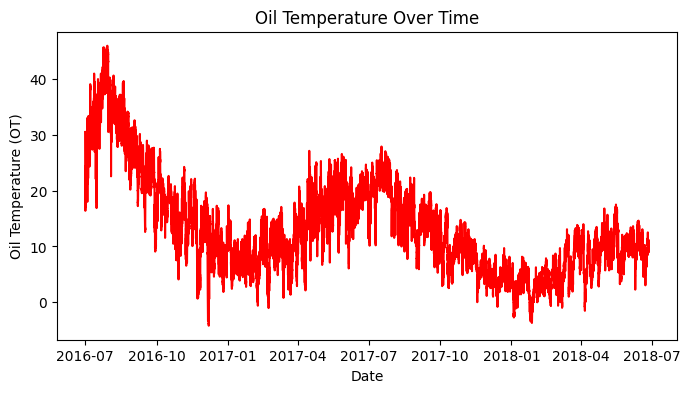

In [80]:
import matplotlib.pyplot as plt

# Plotting OT over time
plt.figure(figsize=(8, 4))
plt.plot(train_df['date'], train_df['OT'], color='red')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Oil Temperature Over Time')
plt.show()


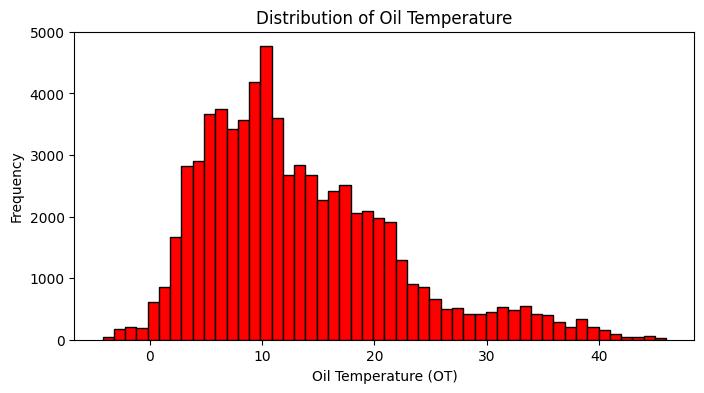

In [81]:
plt.figure(figsize=(8, 4))
plt.hist(train_df['OT'], bins=50, color='red', edgecolor='black')
plt.xlabel('Oil Temperature (OT)')
plt.ylabel('Frequency')
plt.title('Distribution of Oil Temperature')
plt.show()


Create Sequences for train_df

In [82]:
import numpy as np

# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

# Features used for prediction
features = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'hour', 'day_of_week', 'month', 'OT']
data = train_df[features].values

# Define sequence length
sequence_length = 24

# Split data into training and testing sets
train_data = data[:-sequence_length]  # All data except the last 24 hours
test_data = data[-sequence_length:]   # Last 24 hours of data

# Create sequences for training
train_sequences = create_sequences(train_data, sequence_length)
X_train_seq = train_sequences[:, :-1, :]  # Sequences of length 23
y_train_seq = train_sequences[:, -1, -1]  # Target 'OT' values (the last step in the sequence)






In [83]:
# Check shapes
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)

X_train_seq shape: (69633, 23, 10)
y_train_seq shape: (69633,)


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

def build_lstm_model(input_shape):
    model = Sequential()
    
    # First LSTM layer with dropout and batch normalization
    model.add(LSTM(units=80, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    # Second LSTM layer with dropout and batch normalization
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    # Third LSTM layer with dropout and batch normalization
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    # Fully connected layer with activation function
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


In [85]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [86]:
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
model = build_lstm_model(input_shape)


c:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:

history = model.fit(
    X_train_seq, 
    y_train_seq, 
    epochs=15, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - loss: 26.7754 - val_loss: 0.6011
Epoch 2/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 2.3602 - val_loss: 0.3705
Epoch 3/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - loss: 1.6623 - val_loss: 0.6369
Epoch 4/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - loss: 1.4618 - val_loss: 0.3080
Epoch 5/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - loss: 1.2555 - val_loss: 0.3573
Epoch 6/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - loss: 1.1500 - val_loss: 0.2508
Epoch 7/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - loss: 1.0436 - val_loss: 0.2102
Epoch 8/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - loss: 0.9964 - val_loss: 0.2070
Epoch 9/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - loss: 0.8902 - val_loss: 0.2184
Epoch 10/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - loss: 0.9207 - val_loss: 0.1907
Epoch 11/15
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - loss: 0.8418 - val_loss: 0.2340
Epoch 1

In [88]:
import numpy as np

def forecast(model, last_sequence, n_steps):
    predictions = []
    for _ in range(n_steps):
        # Prepare input for prediction
        input_sequence = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])
        pred = model.predict(input_sequence)
        predictions.append(pred[0, 0])
        # Update the last_sequence with the new prediction
        last_sequence = np.roll(last_sequence, shift=-1, axis=0)
        last_sequence[-1, -1] = pred[0, 0]  # Replace the last value with the prediction
    return predictions


In [89]:
last_sequence = X_train_seq[-1]
# Forecast the next 24 hours
n_steps = 24
future_predictions = forecast(model, last_sequence, n_steps)
print("Future predictions:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Future predictions: [9.713887, 9.588985, 9.727736, 9.65152, 9.662629, 9.79378, 9.754841, 9

In [90]:
len(future_predictions)

24

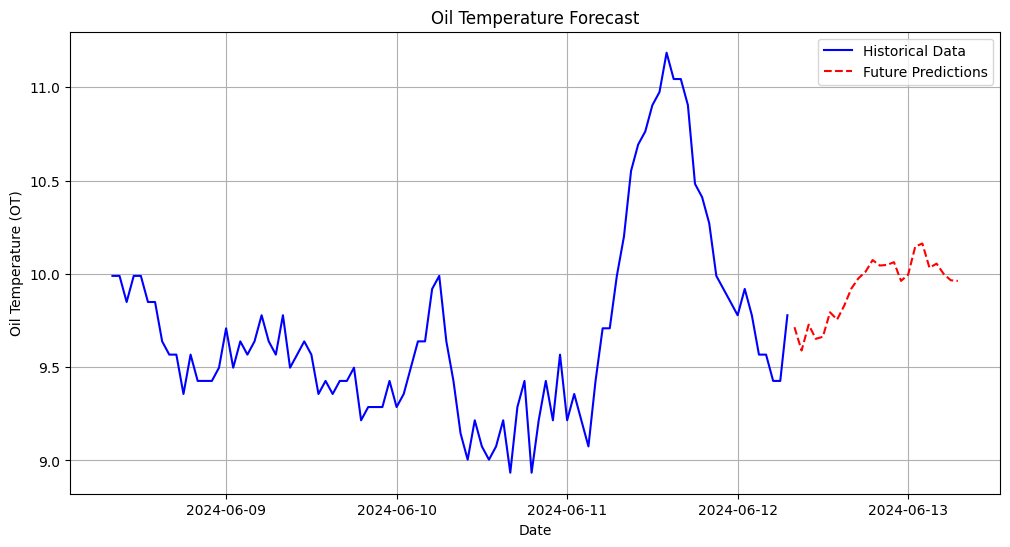

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract OT values from the last column
historical_ot = data[:, -1]

# Create DataFrame for historical data
historical_df = pd.DataFrame({
    'date': pd.date_range(start='2016-07-01 00:00:00', periods=len(historical_ot), freq='h'),
    'OT': historical_ot
})

# Get the last 96 hours of historical data
last_96_hours = historical_df.tail(96)

# Generate future timestamps for the next 96 hours
future_time_index = pd.date_range(start=last_96_hours['date'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='h')

# Create DataFrame for future predictions
future_df = pd.DataFrame({
    'Predicted_OT': future_predictions
}, index=future_time_index)

# Combine historical and future DataFrames
combined_df = pd.concat([last_96_hours.set_index('date'), future_df])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(last_96_hours['date'], last_96_hours['OT'], label='Historical Data', color='blue')
plt.plot(future_df.index, future_df['Predicted_OT'], label='Future Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Oil Temperature Forecast')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
# Save the model in Keras format
model.save('lstm_model.keras')


C:\Users\My PC\AppData\Local\Temp\ipykernel_5020\390255049.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_index = pd.date_range(start=last_24_hours_actual['date'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='H')


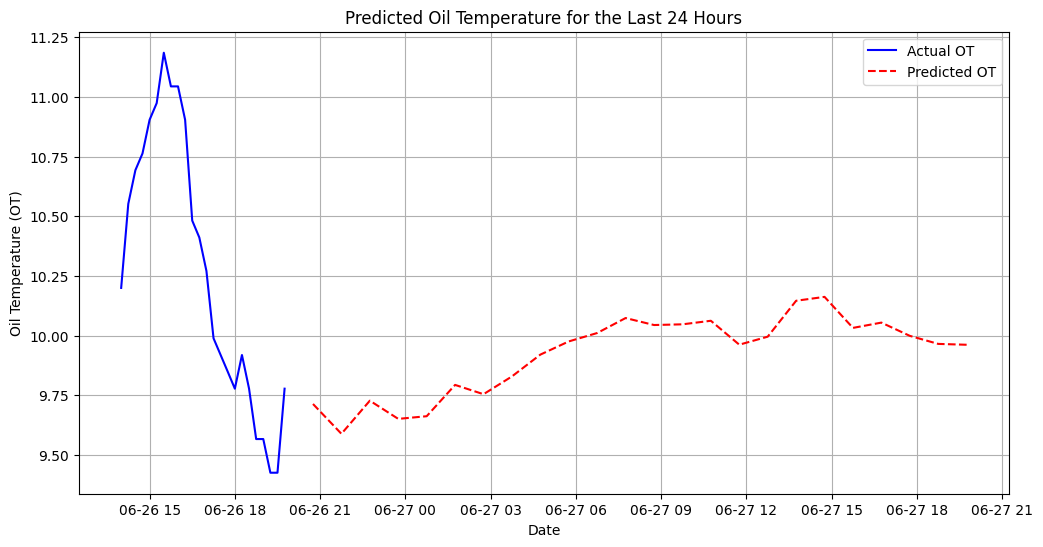

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

last_24_hours_actual = train_df.tail(24)
last_24_hours_actual = last_24_hours_actual[['date', 'OT']]

# Create a DataFrame for predictions
future_time_index = pd.date_range(start=last_24_hours_actual['date'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
predicted_df = pd.DataFrame({
    'date': future_time_index,
    'Predicted_OT': future_predictions
})

combined_df = pd.concat([last_24_hours_actual.set_index('date'), predicted_df.set_index('date')])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(last_24_hours_actual['date'], last_24_hours_actual['OT'], label='Actual OT', color='blue')
plt.plot(predicted_df['date'], predicted_df['Predicted_OT'], label='Predicted OT', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Predicted Oil Temperature for the Last 24 Hours')
plt.legend()
plt.grid(True)
plt.show()
